# Data Gathering and Exploration

This notebook will show the method used to gather the image data as well as some initial data exploration.

## Source Code Acquisition

### Selenium

The website I'm downloading the images from is what is called an infinite scroll website.  Not all the images are loaded at once.  As you scroll down more images load.  I'll use Selenium with a chrome driver to fully scroll through the websites.  Once it has scrolled to the bottom of the site I will grab the sites source code and save it to a text file.

In [4]:
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup as bs

# I used Chrome; you can use whichever browser you like.
options = webdriver.ChromeOptions()
options.binary_location = r"C:\Program Files (x86)\Google\Chrome\Application\chrome.exe"
browser = webdriver.Chrome(ChromeDriverManager().install(), chrome_options=options)

# Tell Selenium to get the URL you're interested in.
site = "https://www.insectimages.org/browse/taxthumb.cfm?class=102"
browser.get(site)

# Selenium script to scroll to the bottom, wait 3 seconds for the next batch of data to load, then continue scrolling.  It will continue to do this until the page stops loading new data.
lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
match=False
while(match==False):
    lastCount = lenOfPage
    time.sleep(3)
    lenOfPage = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
    if lastCount==lenOfPage:
        match=True

# Now that the page is fully scrolled, grab the source code.
source_data = browser.page_source

# Throw your source into BeautifulSoup and start parsing!
soup = bs(source_data, features="lxml")

# write soup to a txt file
with open("centipedes.txt", "w") as file:
    file.write(str(soup))


Checking for win32 chromedriver:75.0.3770.90 in cache
Driver found in C:\Users\sewing\.wdm\chromedriver\75.0.3770.90\win32/chromedriver.exe


C:\Users\sewing\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: use options instead of chrome_options
  if __name__ == '__main__':


## URL Mining and Image Downloading

Now that we have the source code for the website the images are on we can use the soup file we saved to find the URLs of the images.  There are some images that aren't .jpg so those will be filtered out with a second list comprehension.

With the URLs in hand we can go ahead and download the set of images.  There were a few tricky things with this process.  First the URLs we get are missing the "http:" in their address so that needs to be concatenated on in the get request.  Second the site requires you to supply a user agent in the header of your request.  

In [2]:
with open("centipedes.txt", "rb") as f:
    soup = bs(f.read(), "lxml") 

img_tags = soup.find_all('img')

urls = [img['src'] for img in img_tags]
urls = [url for url in urls if url[-4:] == '.jpg']

import requests
import re
hdr = {'User-Agent': 'Mozilla/5.0'}

for url in urls:
    filename = re.search(r'([\w_-]+[.](jpg|gif|png))$', url)
    with open(filename.group(1), 'wb') as f:
        response = requests.get("http:"+url, headers=hdr)
        f.write(response.content)

Now the images should be downloaded and we can see them here.

In [37]:
ls *.jpg

 Volume in drive C is OS
 Volume Serial Number is 26AE-3B0C

 Directory of C:\Users\sewing

06/18/2019  08:58 AM            37,680 0001055.jpg
06/18/2019  08:58 AM           116,144 1225124.jpg
06/18/2019  08:58 AM            38,594 1274066.jpg
06/18/2019  08:58 AM            21,591 1386033.jpg
06/18/2019  08:58 AM            20,064 1386034.jpg
06/18/2019  08:58 AM            21,090 1386035.jpg
06/18/2019  08:58 AM           123,305 5084041.jpg
06/18/2019  08:58 AM           121,007 5084042.jpg
06/18/2019  08:58 AM           148,100 5302056.jpg
06/18/2019  08:58 AM           133,474 5305047.jpg
06/18/2019  08:58 AM            28,319 5360730.jpg
06/18/2019  08:58 AM            19,314 5382160.jpg
06/18/2019  08:58 AM            17,223 5386159.jpg
06/18/2019  08:58 AM            11,520 5386160.jpg
06/18/2019  08:58 AM            36,959 5445255.jpg
06/18/2019  08:58 AM            16,369 5445296.jpg
06/18/2019  08:58 AM            14,742 5445306.jpg
06/18/2019  08:58 AM            18,329 54

I'll make a new directory for this set of images and copy the files there.

In [34]:
mkdir centipedes

A subdirectory or file centipedes already exists.


In [38]:
copy *.jpg centipedes

0001055.jpg
1225124.jpg
1274066.jpg
1386033.jpg
1386034.jpg
1386035.jpg
5084041.jpg
5084042.jpg
5302056.jpg
5305047.jpg
5360730.jpg
5382160.jpg
5386159.jpg
5386160.jpg
5445255.jpg
5445296.jpg
5445306.jpg
5445307.jpg
5473412.jpg
5473413.jpg
5473414.jpg
5473415.jpg
5482805.jpg
5482829.jpg
entsoc.jpg
gmnh.jpg
       26 file(s) copied.


In [39]:
ls centipedes\*

 Volume in drive C is OS
 Volume Serial Number is 26AE-3B0C

 Directory of C:\Users\sewing\centipedes

06/18/2019  08:41 AM    <DIR>          .
06/18/2019  08:41 AM    <DIR>          ..
06/18/2019  08:58 AM            37,680 0001055.jpg
06/18/2019  08:58 AM           116,144 1225124.jpg
06/18/2019  08:58 AM            38,594 1274066.jpg
06/18/2019  08:58 AM            21,591 1386033.jpg
06/18/2019  08:58 AM            20,064 1386034.jpg
06/18/2019  08:58 AM            21,090 1386035.jpg
06/18/2019  08:58 AM           123,305 5084041.jpg
06/18/2019  08:58 AM           121,007 5084042.jpg
06/18/2019  08:58 AM           148,100 5302056.jpg
06/18/2019  08:58 AM           133,474 5305047.jpg
06/18/2019  08:58 AM            28,319 5360730.jpg
06/18/2019  08:58 AM            19,314 5382160.jpg
06/18/2019  08:58 AM            17,223 5386159.jpg
06/18/2019  08:58 AM            11,520 5386160.jpg
06/18/2019  08:58 AM            36,959 5445255.jpg
06/18/2019  08:58 AM            16,369 5445296.jp

Here I'll delete the files from the working directory since I just copied them to a subdirectory.

In [40]:
import os

dir_name = "/Users/sewing"
files = os.listdir(dir_name)

for item in files:
    if item.endswith(".jpg"):
        os.remove(os.path.join(dir_name, item))

## Image Check

Lets look at a few of the images from this sample set.

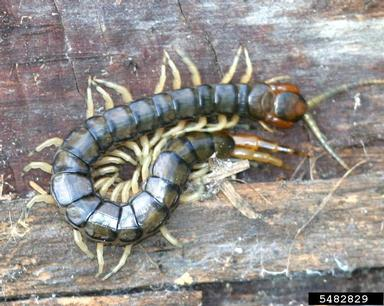

In [44]:
from IPython.display import Image
Image(filename=r'C:\Users\sewing\centipedes\5482829.jpg') 

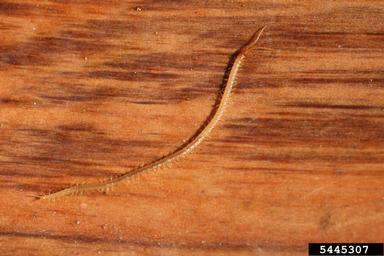

In [45]:
Image(filename=r'C:\Users\sewing\centipedes\5445307.jpg') 

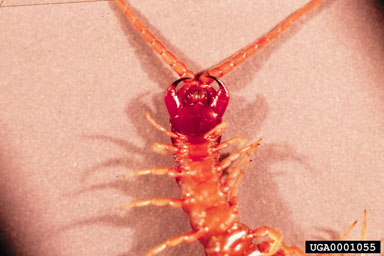

In [46]:
Image(filename=r'C:\Users\sewing\centipedes\0001055.jpg') 

## Image Metadata

In [8]:
from bs4 import BeautifulSoup as bs
import re
import pandas as pd

def get_meta_data(file):
    with open(file, "rb") as f:
        soup = bs(f.read(), "lxml")
    b = "//bugwoodcloud.org/images/"
    img_tags = soup.find_all('img', src = True)
    urls = [img['src'] for img in img_tags]
    urls = [url for url in urls if url[-4:] == '.jpg' and url[0:26] == b]
    img_num = [url[-11:-4] for url in urls]
    img_size = [url[-19:-12] for url in urls]
    divs = soup.find_all("div", class_="img-foot")
    regex = r"<div class=\"img-foot\">(?P<common_name>[a-zA-Z ]*)<br/><em>(?P<scientific_name>[a-zA-Z ]*)</em>[sp\.]*<br/>(?P<photographer>[a-zA-Z \.]*)"
    matches = re.finditer(regex, str(divs), re.MULTILINE)
    common_name = []
    scientific_name = []
    photographer = []
    for matchNum, match in enumerate(matches, start=1):
        for groupNum in range(0, len(match.groups())):
            groupNum = groupNum + 1
            if groupNum == 1:
                common_name.append(match.group(groupNum))
            if groupNum == 2:
                scientific_name.append(match.group(groupNum))
            if groupNum == 3:
                photographer.append(match.group(groupNum))
    df = pd.DataFrame(list(zip(urls, img_num, img_size, common_name, scientific_name, photographer)), columns = ['url', 'img_num', 'img_size', 'common_name', 'scientific_name', 'photographer'])
    return df

In [9]:
centipedes = get_meta_data('centipedes.txt')
centipedes['order'] = 'Chilopoda'
centipedes['order_common'] = 'Centipedes'

centipedes.head()

,url,img_num,img_size,common_name,scientific_name,photographer,order,order_common
0,//bugwoodcloud.org/images/384x256/5482829.jpg,5482829,384x256,stone centipedes,,Johnny N. Dell,Chilopoda,Centipedes
1,//bugwoodcloud.org/images/384x256/5482805.jpg,5482805,384x256,stone centipedes,,Johnny N. Dell,Chilopoda,Centipedes
2,//bugwoodcloud.org/images/384x256/5473415.jpg,5473415,384x256,stone centipede,Lithobius,Joseph Berger,Chilopoda,Centipedes
3,//bugwoodcloud.org/images/384x256/5473414.jpg,5473414,384x256,stone centipede,Lithobius,Joseph Berger,Chilopoda,Centipedes
4,//bugwoodcloud.org/images/384x256/5473413.jpg,5473413,384x256,stone centipede,Lithobius,Joseph Berger,Chilopoda,Centipedes


## Next Steps

I'll follow this same process for the other insect types then proceed to the ETL.